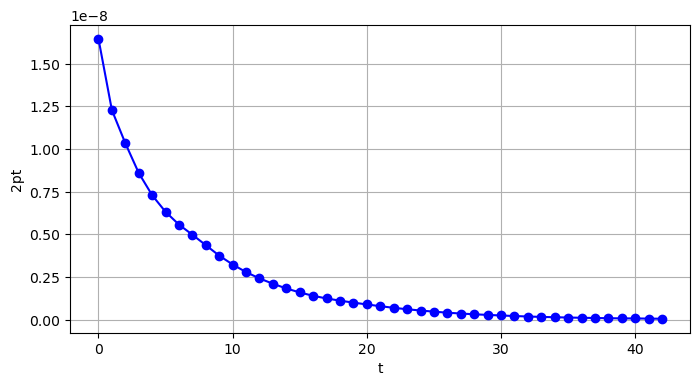

[8.75150419e-10 3.09216391e-02]


In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Parse the XML file
tree = ET.parse("/pscratch/sd/h/hari_8/nEDM_project_LANL/WF0p1_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_HP.dat.xml")
LT=42
root = tree.getroot()
def exponential_decay(x, a, b):
    return a * (np.exp(-b * x) + np.exp(-b*(LT-x)))

values = []
for elem in root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='15']/momenta/elem[sink_mom_num='0']/mesprop/"):
    re_value = elem.find("re").text
    values.append(float(re_value))

data = np.array(values)
averaged_data = np.append((data[0:41] + data[42:83] + data[84:125])/3 , data[126:128])


x = np.arange(len(averaged_data))

plt.figure(figsize=(8, 4))
plt.plot(x, averaged_data, marker='o', linestyle='-', color='b')
plt.xlabel("t")
plt.ylabel("2pt")
plt.grid(True)
plt.show()

params_dr, cov_dr = curve_fit(exponential_decay, x[10:35], data[10:35])
m_fit = params_dr
m_err = np.sqrt(np.diag(cov_dr))
print(m_fit)

In [4]:
a = 0.094
(0.15*197)/0.11403

259.14233096553534

[0.13182609]


/tmp/ipykernel_1124908/2386233646.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.suptitle("$M_{0} ~= ~ [%f~ \u00B1 ~ %f] ~~ MeV$"%(mass_mexp, mass_err_mexp), fontsize=15)


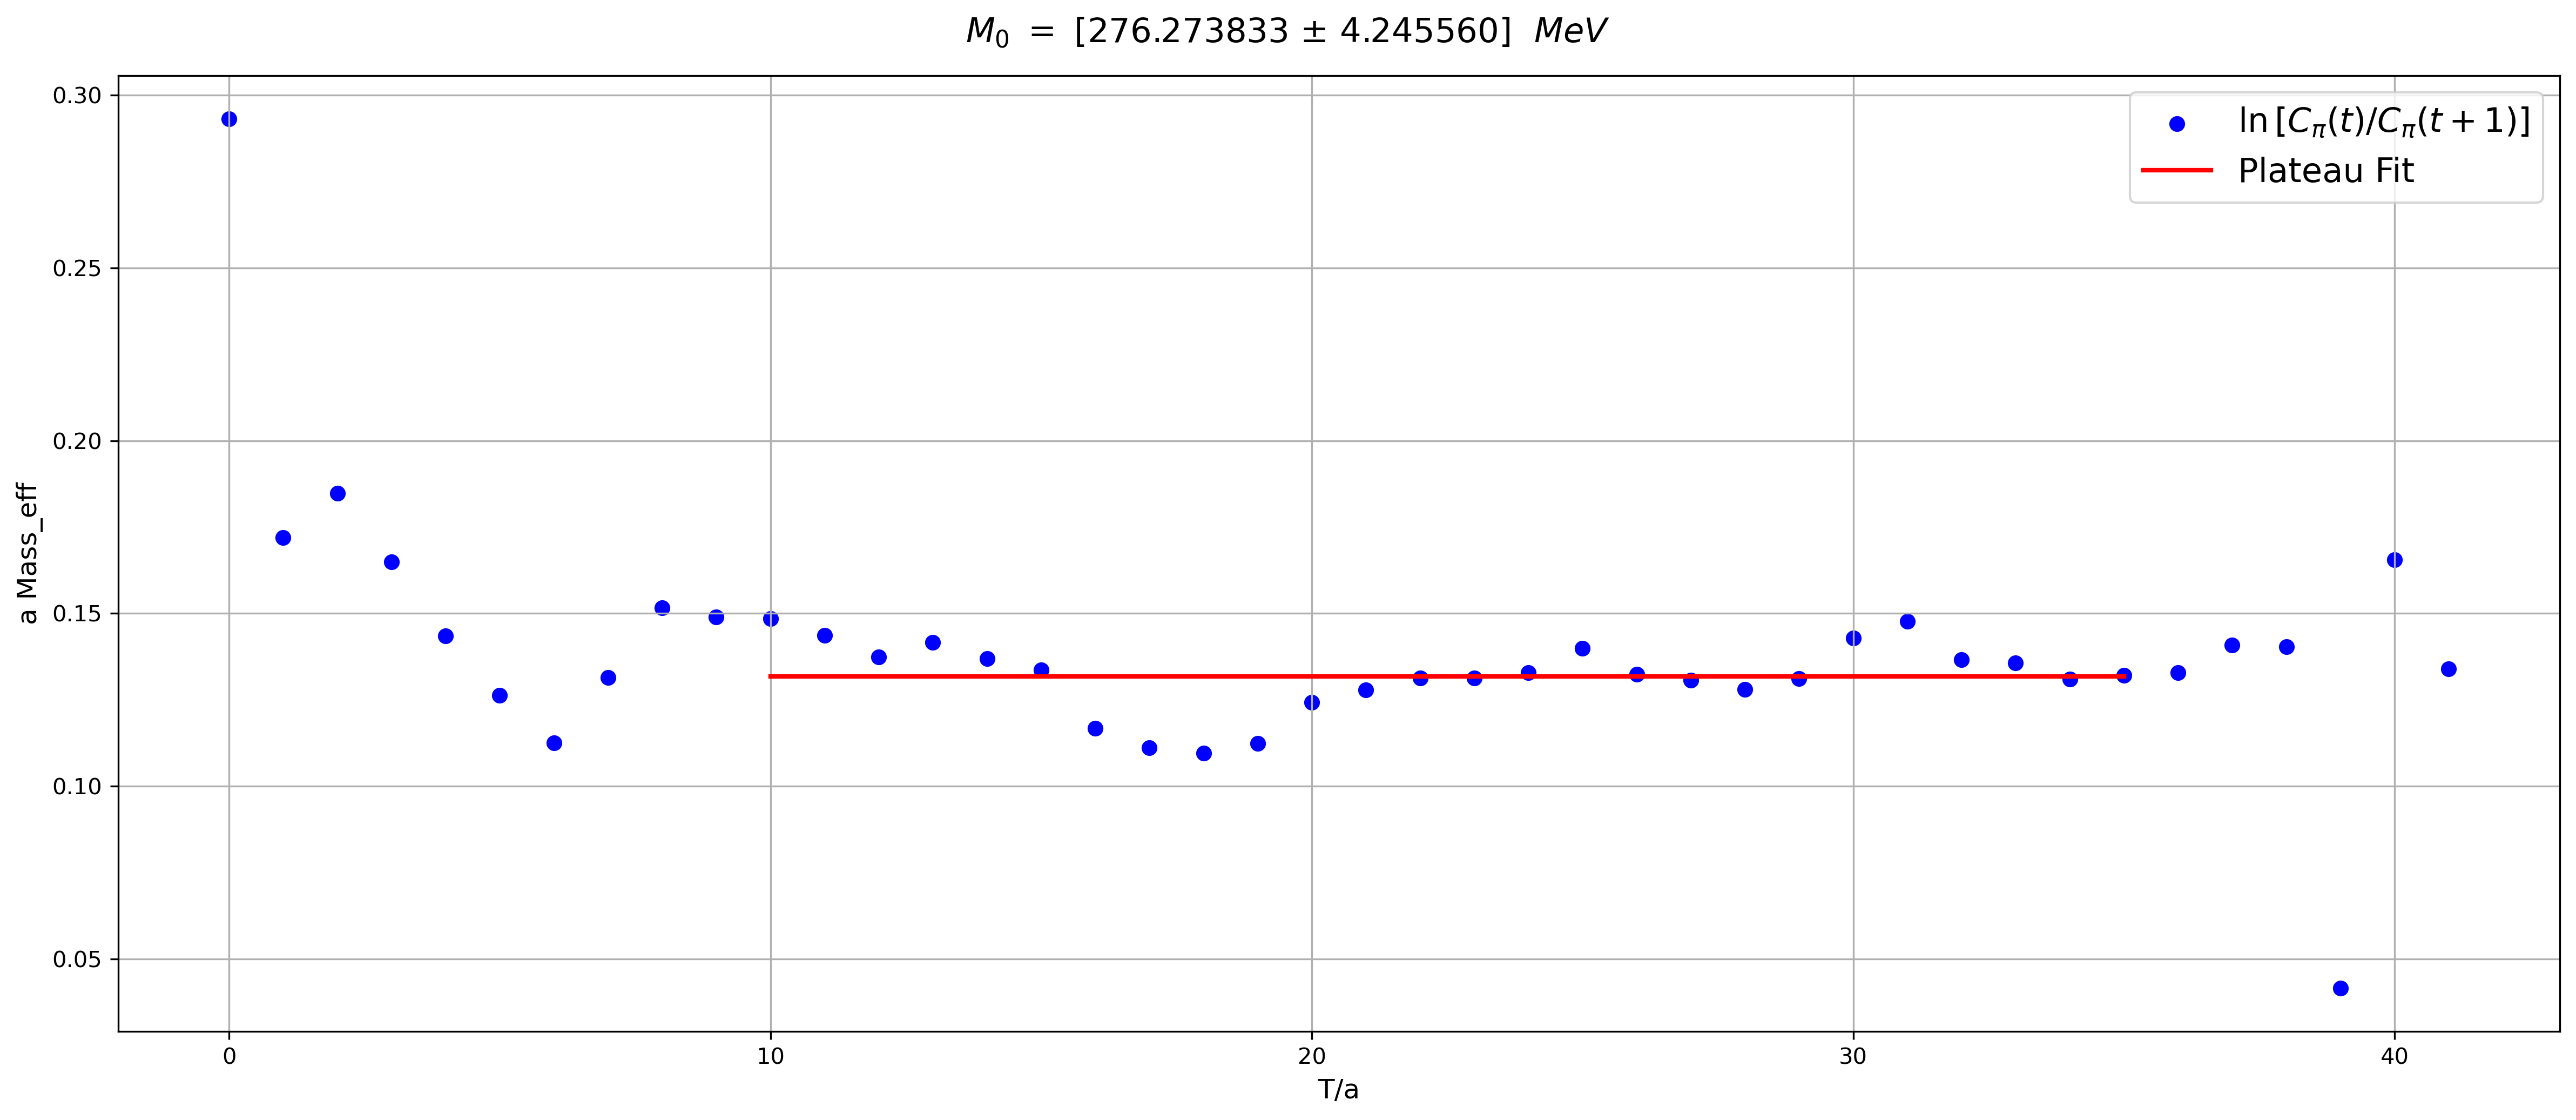

--------------------------------------------------------------------------------------------------------------------------


In [3]:


# plateau_fit
def plateau_fit(x, m0):
    return m0
a = 0.094

def mass_eff_plot(plateau_t_i, plateau_t_f):
    Mass_eff_list = []
    for time in range(0, 42):
        Mass_eff = np.log(averaged_data[time] / averaged_data[time +1])
        Mass_eff_list.append(Mass_eff)
    time_for_m_eff = list(range(0, 42))
    time_for_plateau = list(range(plateau_t_i, plateau_t_f + 1))
    ####################### Curve fitting multi exponential decay #######################
    Mass_eff_list_plateau = []
    for t_plateau in range(plateau_t_i, plateau_t_f + 1):
        Mass_eff_list_plateau.append(Mass_eff_list[t_plateau])
    params_mexp, cov_mexp = curve_fit(plateau_fit, time_for_plateau, Mass_eff_list_plateau)
    m0_fit = params_mexp
    m0_err = np.sqrt(np.diag(cov_mexp))
    x_curve_mexp = np.linspace(np.min(time_for_plateau), np.max(time_for_plateau), 100)
    y_curve_mexp = np.full(100, m0_fit)  
    print(m0_fit)
    mass_mexp = (m0_fit*197)/a
    mass_err_mexp = (m0_err*197)/a
    plt.subplots(figsize=(16, 7),dpi=300)
    plt.scatter(time_for_m_eff, Mass_eff_list, color='blue', label='$\ln{[{C_{\pi}(t)}/{C_{\pi}(t+1)}]}$')
    plt.plot(x_curve_mexp, y_curve_mexp, 'r-', linewidth=2, label='Plateau Fit')
    plt.xlabel("T/a", fontsize=12)
    plt.ylabel("a Mass_eff", fontsize=12)
    plt.suptitle("$M_{0} ~= ~ [%f~ \u00B1 ~ %f] ~~ MeV$"%(mass_mexp, mass_err_mexp), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True) 
    plt.tight_layout()
    plt.show()  
    print("--------------------------------------------------------------------------------------------------------------------------")
    return

mass_eff_plot(10, 35)